In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os
import time as systime
%matplotlib notebook

<IPython.core.display.Javascript object>


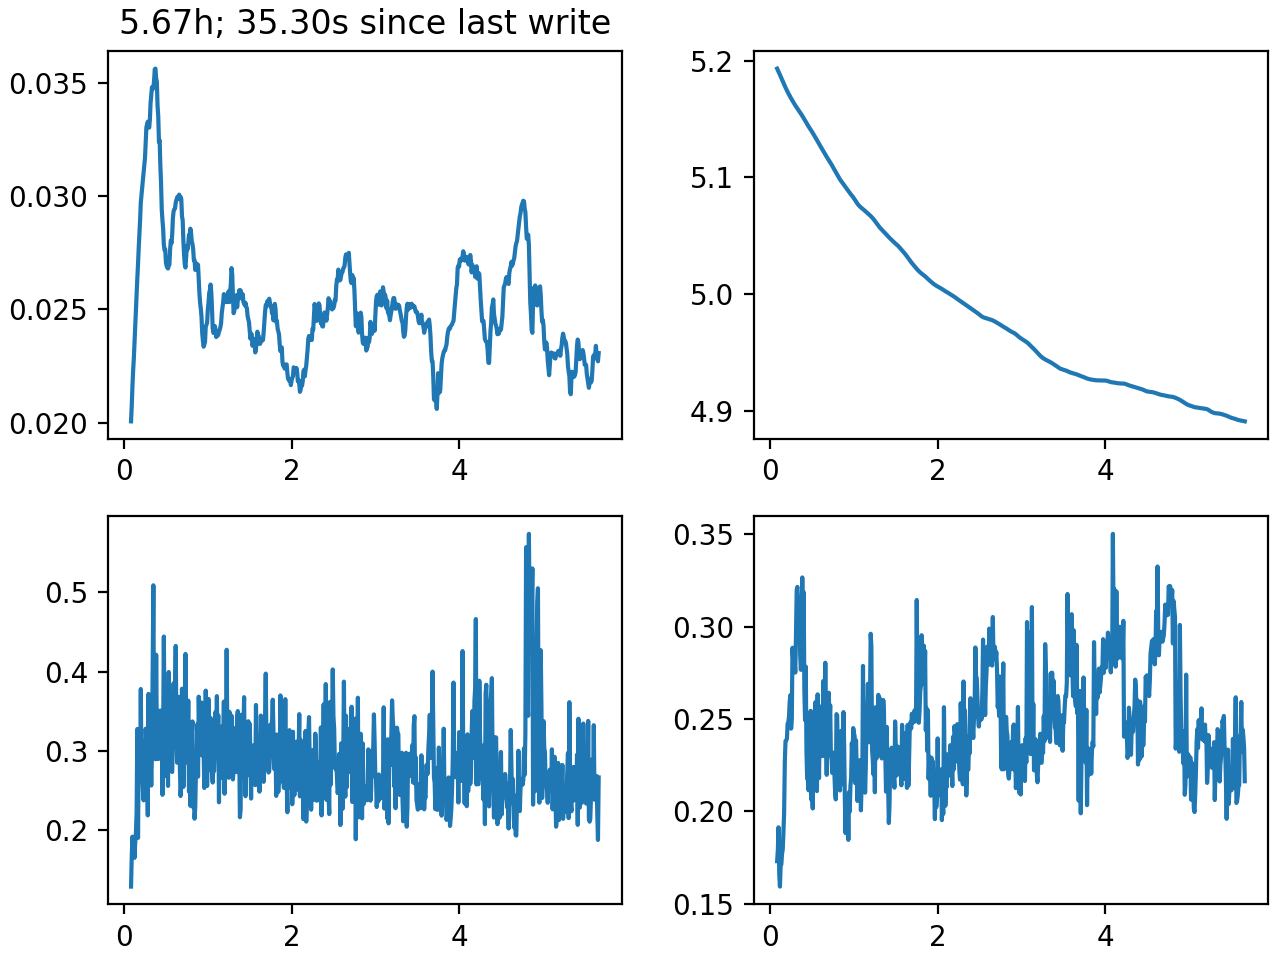

Text(0.5,1,'5.67h; 35.30s since last write')

In [8]:
# !rsync -av conrad.navydsrc.hpc.mil:ForcedChannel/results/ChannelCoarse02/input/STDOUT.0000 ../reduceddata/STDOUT.0000
fig, ax = plt.subplots(2, 2, constrained_layout=True)
for fn in ['../reduceddata/STDOUT.0000']:
    time = np.zeros(20000)
    meantemp = np.zeros(20000)
    meanke = np.zeros(20000)
    cflw = np.zeros(20000)
    cflu = np.zeros(20000)
    n=-1
    dt = -os.path.getmtime(fn)+systime.time()
    
    with open(fn, 'r') as fin:
        for line in fin:
            if 'time_secondsf' in line:
                n += 1
                time[n] = float(line.split('=')[1])
            elif 'ke_mean' in line:
                meanke[n] = float(line.split('=')[1])
            elif 'dynstat_theta_mean' in line:
                meantemp[n] = float(line.split('=')[1])
            elif 'advcfl_wvel_max' in line:
                cflw[n] = float(line.split('=')[1])
            elif 'advcfl_uvel_max' in line:
                cflu[n] = float(line.split('=')[1])
    time = time[:n]/365/3600/24
    meantemp = meantemp[:n]
    meanke = meanke[:n]
    cflw = cflw[:n]
    cflu = cflu[:n]
    ax[0,0].plot(time, meanke)
    ax[0,1].plot(time, meantemp)
    ax[1,0].plot(time, cflw)
    ax[1,1].plot(time, cflu)
ax[0,0].set_title('{:3.2f}h; {:1.2f}s since last write'.format(time[-1], dt))

        